IA & Data science (3i026) -- 2018-2019
--------
*&copy; Equipe pédagogique: Manon Ansart, Vincent Guigue, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander.*


# TD-TME03: programmation du perceptron

Dans ce TP, nous allons principalement programmer un perceptron, en nous restreignant au cas binaire où les données sont étiquetées $+1$ ou $-1$ (comme les séances précédentes).

<font size="+1" color="RED">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

CARNIELLI Ariana

<font color="RED" size="+1">**[Q]**</font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>tme-03</tt> et rajouter à la suite de <tt>tme-03</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au fichier à poster** : *tme-03-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme
- ne pas compresser ou faire une archive: il faut rendre le fichier ipython tel quel, éventuellement, si vous avez d'autres fichiers vous les rendez séparément.

**Echancier pour la soumission de votre compte-rendu:**
- le compte-rendu d'une séance doit être remis obligatoirement <font color="RED">** à la fin de la séance**</font>. C'est ce compte-rendu qui donne la note de base de la séance.
- vous pouvez éventuellement compléter votre compte-rendu  pour obtenir des points bonus, dans ce cas, vous devez soumettre votre complément avant le début de la semaine suivante.

** Sur la page Moodle de remise du travail <font color="RED">ne pas oublier d'envoyer le compte rendu</font>** à la fin de la séance, la soumission de la version complémentaire post-séance se fera sur une page différente.

## Création d'une librairie

Afin de pouvoir réutiliser les classes et fonctions écrites dans les séances de TDTME précédentes, on va construire une librairie qu'il suffira d'importer.

Récupérer l'archive iads.tgz et le désarchiver de telle sorte que le répertoire iads soit un répertoire frère du répertoire tme03.

Ainsi, vous devrez avoir l'arborescence suivante dans votre répertoire $HOME:

    - 3i026/
        - tme01/
            - tme01.ipynb
        - tme02/
            - tme02.ipynb
        - tme03/
            - tme03.ipynb
        - iads/
            - Classifiers.py
            - LabeledSet.py
            - utils.py
          

**Important** :
- ce fichier tme03.ipynb doit toujours rester dans le répertorie tme03/
- pour ouvrir les fichiers py qui se trouvent dans le répertoire iads/ il est nécessaire d'utiliser un éditeur de texte comme emacs, gedit, idle,...


<font color="RED" size="+1">**[Q]**</font> **Ouvrir et compléter les fichiers Classifiers.py et utils.py**

Pour compléter ces fichiers, reprendre le code écrit dans le TDTME précédent pour compléter toute les parties indiquées <tt>#TODO</tt>.
- dans utils.py, il faut compléter la fonction createGaussianDataset
- dans Classifiers.py, il faut compléter le code des classifiers

Une fois ces fichiers complétés, la librairie <tt>iads</tt> peut être importée dans ce notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')

# Importation de la librairie iads
import iads as iads

# importation de LabeledSet
from iads import LabeledSet as ls

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

La commande <tt>help</tt> permet d'avoir des informations sur le contenu d'une librairie importée:

In [2]:
help(iads)

Help on package iads:

NAME
    iads

DESCRIPTION
    Package: iads
    File: __init__.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

PACKAGE CONTENTS
    Classifiers
    LabeledSet
    utils

FILE
    c:\users\arian\documents\3i026\iads\__init__.py




In [3]:
help(ls)

Help on module iads.LabeledSet in iads:

NAME
    iads.LabeledSet

DESCRIPTION
    Package: iads
    Fichier: LabeledSet.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

CLASSES
    builtins.object
        LabeledSet
    
    class LabeledSet(builtins.object)
     |  Classe pour représenter un ensemble d'exemples (base d'apprentissage)
     |  Variables d'instance :
     |      - input_dimension (int) : dimension de la description d'un exemple (x)
     |      - nb_examples (int) : nombre d'exemples dans l'ensemble
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_dimension)
     |      Constructeur de LabeledSet
     |      Argument: 
     |          - intput_dimension (int) : dimension de x
     |      Hypothèse : input_dimension > 0
     |  
     |  addExample(self, vector, label)
     |      Ajout d'un exemple dans l'ensemble
     |      Argument: 
     |          - vector ()
     |          - label (int) : classe de l'exemple (+1 ou -1)
     |  

In [4]:
help(cl)

Help on module iads.Classifiers in iads:

NAME
    iads.Classifiers

DESCRIPTION
    Package: iads
    Fichier: Classifiers.py
    Année: semestre 2 - 2018-2019, Sorbonne Université

CLASSES
    builtins.object
        Classifier
            ClassifierKNN
            ClassifierLineaireRandom
    
    class Classifier(builtins.object)
     |  Classe pour représenter un classifieur
     |  Attention: cette classe est une classe abstraite, elle ne peut pas être
     |  instanciée.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, input_dimension)
     |      Constructeur de Classifier
     |      Argument:
     |          - intput_dimension (int) : dimension d'entrée des exemples
     |      Hypothèse : input_dimension > 0
     |  
     |  accuracy(self, dataset)
     |      Permet de calculer la qualité du système
     |  
     |  predict(self, x)
     |      rend la prediction sur x (-1 ou +1)
     |  
     |  train(self, labeledSet)
     |      Permet d'entrainer l

Dans les boîtes suivantes, on utilise ces librairies avec les exemples vus en TDTME-02.

In [5]:
# Exemple d'utilisation de LabeledSet

une_base = ls.LabeledSet(2)        # définition d'une base pour contenir des exemples en 2D

une_base.addExample([0, 1],1)   # ajout de l'exemple (0, 1) de classe +1
une_base.addExample([2, 3],1)   # ajout de l'exemple (2, 3) de classe +1
une_base.addExample([1, 2],-1)  # ajout de l'exemple (1, 2) de classe -1
une_base.addExample([2, 2],-1)  # ajout de l'exemple (2, 2) de classe -1

# Fonction pour afficher le LabeledSet
def affiche_base(LS):
    """ LabeledSet
        affiche le contenu de LS
    """
    for i in range(0,LS.size()):
        print("Exemple "+str(i))
        print("\tdescription : ",LS.getX(i))
        print("\tlabel : ",LS.getY(i))
    return

# Affichage de la base
affiche_base(une_base)

Exemple 0
	description :  [0 1]
	label :  [1]
Exemple 1
	description :  [2 3]
	label :  [1]
Exemple 2
	description :  [1 2]
	label :  [-1]
Exemple 3
	description :  [2 2]
	label :  [-1]


Taille de la base jouet générée : 20 exemples


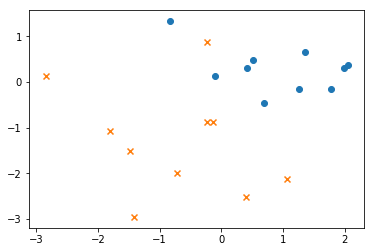

In [6]:
# Exemple d'utilisation de utils

the_set = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),10)

print("Taille de la base jouet générée :", the_set.size(), "exemples")

# Affichage :
ut.plot2DSet(the_set)


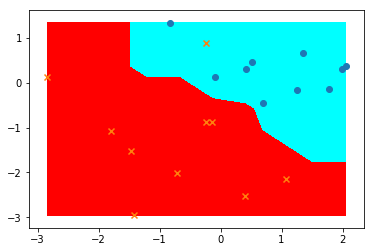

In [7]:
# Exemple d'utilisation de Classifiers pour créer un knn:

knn = cl.ClassifierKNN(2,3)

knn.train(the_set)

ut.plot_frontiere(the_set,knn)
ut.plot2DSet(the_set)

<font color="RED" size="+2">**Très important**</font>: tout le reste du travail à faire dans ce TDTME ne doit être fait que dans le notebook. Il ne faut plus modifier les fichiers de la librairie.

Le compte-rendu de cette séance ne comportera que le fichier notebook.


Perceptron aléatoire
====

La classe <tt>ClassifierPerceptronRandom</tt> suivante hérite de la classe `Classifier`. Elle implémente un modèle de perceptron aléatoire qui modélise un hyperplan $f_w(x)=\langle w ; x \rangle$ tel que $w$ est tiré aléatoirement lors de la création.





In [8]:
class ClassifierPerceptronRandom(cl.Classifier):
    def __init__(self, input_dimension):
        """ Argument:
                - input_dimension (int) : dimension d'entrée des exemples
            Hypothèse : input_dimension > 0
        """  
        v = np.random.rand(input_dimension)     # vecteur aléatoire à input_dimension dimensions
        self.w = 2*v - 1
        self.w = self.w / np.linalg.norm(self.w)     # on normalise par la norme de w
        
        
        #v = np.random.rand(input_dimension)     # en effet, cette façon de caulculer n'est pas correcte
        #self.w = (2* v - 1) / np.linalg.norm(v)  

    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = np.dot(x, self.w)
        return z
        
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """        
        print("No training needed")

<font color="RED" size="+1">**[Q]**</font> Tester ce modèle de perceptron sur un jeu de données aléatoire.


Accuracy du perceptron aléatoire : 65.0%


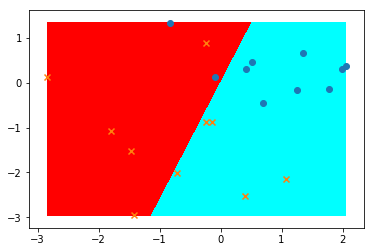

In [9]:
# Exemple de création et d'utilisation d'un Perceptron aléatoire:

perceptron_random = ClassifierPerceptronRandom(2)

ut.plot_frontiere(the_set,perceptron_random)
ut.plot2DSet(the_set)
print("Accuracy du perceptron aléatoire : " + str(perceptron_random.accuracy(the_set))+ "%")

Perceptron de Rosenblatt
===

<font color="RED" size="+1">**[Q]**</font> En héritant de la classe `Classifier`, écrire la classe <tt>ClassifierPerceptron</tt> qui implémente l'algorithme du Perceptron de Rosenblatt vu en cours.

La fonction `train` fera une itération sur l'ensemble des données de l'apprentissage. Les points d'apprentissage seront tirés dans un ordre aléatoire.



In [10]:
class ClassifierPerceptron(cl.Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self,input_dimension,learning_rate):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.w = np.zeros(input_dimension)
        self.e = learning_rate

    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        return np.dot(x, self.w)

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        # parcours des données du labeledSet en ordre aléatoire
        ordre = np.arange(labeledSet.size())
        np.random.shuffle(ordre)
        for i in ordre:
            elem = labeledSet.getX(i)
            z = self.predict(elem)
            if z * labeledSet.getY(i) <= 0:
                self.w += self.e * elem * labeledSet.getY(i)
                # La normalisation de w a été choisie pour garantir
                #que chaque modification de w est petite (de l'ordre de self.e) 
                #par rapport à la valeur précédente de w.
                self.w /= np.linalg.norm(self.w)
        
    def bad_train(self,labeledSet):
        """ Entrainement sur l'ensemble donné sans normalisation de self.w (résultats mauvais)
        """
        # parcours des données du labeledSet en ordre aléatoire
        ordre = np.arange(labeledSet.size())
        np.random.shuffle(ordre)
        for i in ordre:
            elem = labeledSet.getX(i)
            z = self.predict(elem)
            if z * labeledSet.getY(i) <= 0:
                self.w += self.e * elem * labeledSet.getY(i)
                # ici on ne normalize pas. Cela cause des alterations très grandes de la
                # valeur de l'accuracy comme bien demontré dans un cellule a suivre



#avant, on choisit un seul element et s'entrainé sur un element a la fois.
        
#        i = np.random.randint(labeledSet.size())
#        elem = labeledSet.getX(i)
#        z = np.dot(elem, self.w)
#        if z * labeledSet.getY(i) <= 0:
#           self.w = self.w + self.e *(elem * labeledSet.getY(i))

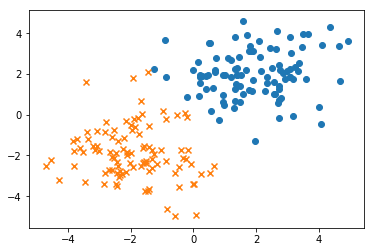

In [11]:
set_learn = ut.createGaussianDataset(np.array([2,2]),np.array([[1.5,0],[0,1.5]]),np.array([-2,-2]),np.array([[1.5,0],[0,1.5]]),100)
ut.plot2DSet(set_learn)

<font color="RED" size="+1">**[Q]**</font> Tester le perceptron de la manière suivante:
- Apprendre pendant N itérations
- Afficher l'accuracy du modèle à chaque itération
- Vérifier que l'accuracy augmente
- Dessiner la frontière obtenue

Accuracy du perceptron: 100.0%


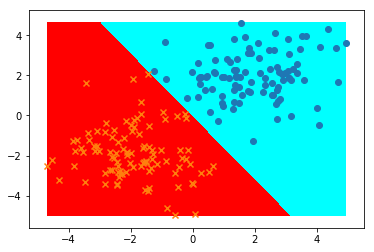

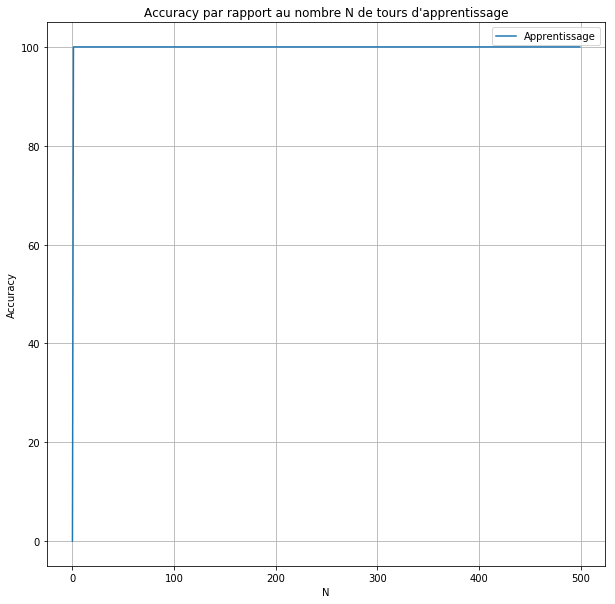

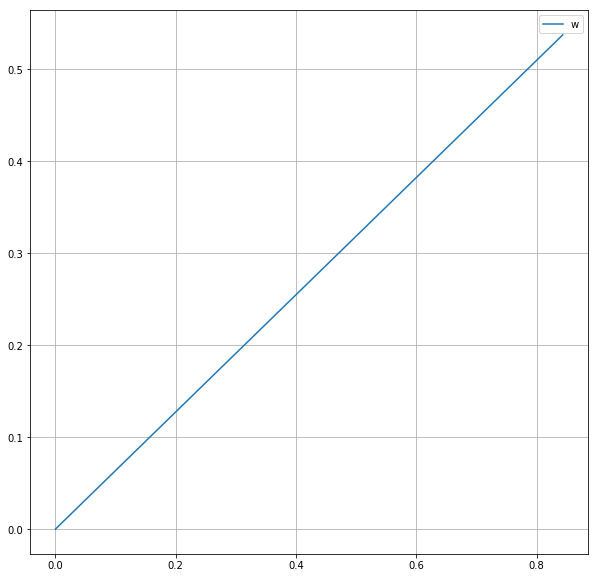

In [12]:
N = 500
e = 0.0001
perceptron = ClassifierPerceptron(2, e)
tab_acc_learn = np.zeros(N)
tab_w = np.empty((N, 2))

for i in range(N):
    tab_acc_learn[i] = perceptron.accuracy(set_learn)
    tab_w[i, :] = perceptron.w
    perceptron.train(set_learn)
    
ut.plot_frontiere(set_learn,perceptron)
ut.plot2DSet(set_learn)
print("Accuracy du perceptron: " + str(perceptron.accuracy(set_learn))+ "%")

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(True)
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
ax.plot(tab_acc_learn, label = 'Apprentissage') 

ax.legend(loc = "upper right")
ax.set_title("Accuracy par rapport au nombre N de tours d'apprentissage");

fig, bx = plt.subplots(figsize=(10, 10))
bx.grid(True)
bx.plot(tab_w[:, 0], tab_w[:, 1], label = 'w') 
bx.legend(loc = "upper right");

On observe que le perceptron a une bonne accuracy sur ces données et ce, dès le premier entrainement, car cet ensemble de données peut être assez bien linéairement séparé par une droite qui passe par l'origine (les deux gaussiennes sont centrées de côtés opposés de l'origine). Cette accuracy oscille très peu au fur des entrainements, car elle dépend de l'ordre dans laquelle les points sont considérés : si on considère en dernier un point qui est très loin de la moyenne de sa gaussienne, `w` cherchera à s'adapter un peu plus à ce point, au risque de perdre un peu son adaptation à plusieurs autres points. Comme on normalise `w`, il sera toujours de norme `1` (à l'exception d'avant le premier entrainement, quand il vaut `0`), et on observe qu'il oscille un peu pendant les itérations.

<font color="RED" size="+1">**[Q]**</font> Expérimentations

- Générer deux ensembles de train et de test
- Dessiner la courbe de performance en fonction de l'itération sur les ensembles de train et de test
    * Que se passe-t-il en fonction du pas (epsilon) d'apprentissage ? 
    * Que se passe-t-il quand le nombre d'exemples en apprentissage est faible ? 


Accuracy du perceptron: 92.0%


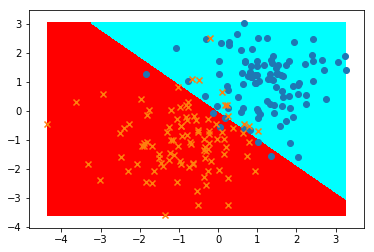

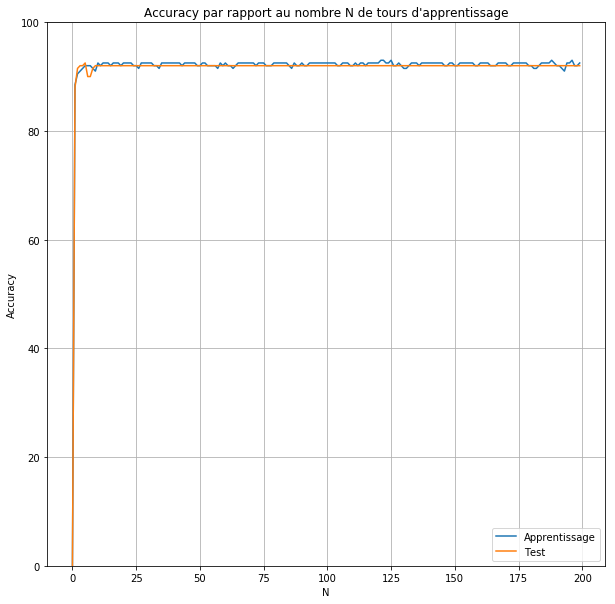

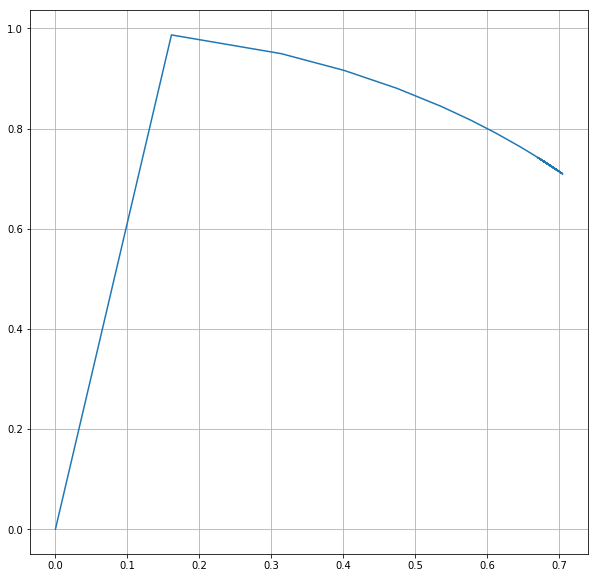

In [13]:
N = 200
e = 0.01

set_learn = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)
set_test = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)

perceptron = ClassifierPerceptron(2, e)

tab_acc_learn = np.zeros(N)
tab_acc_test = np.zeros(N)
tab_w = np.empty((N, 2))

for i in range(N):
    tab_acc_learn[i] += perceptron.accuracy(set_learn)
    tab_acc_test[i] += perceptron.accuracy(set_test)
    tab_w[i, :] = perceptron.w
    perceptron.train(set_learn)


    
ut.plot_frontiere(set_test,perceptron)
ut.plot2DSet(set_test)
print("Accuracy du perceptron: " + str(perceptron.accuracy(set_test))+ "%")

tab_N = np.arange(N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(True)
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
ax.set_ylim([0, 100])
ax.plot(tab_N, tab_acc_learn, label = 'Apprentissage') 
ax.plot(tab_N, tab_acc_test, label = 'Test')

ax.legend(loc = "lower right")
ax.set_title("Accuracy par rapport au nombre N de tours d'apprentissage")



fig, bx = plt.subplots(figsize=(10, 10))
bx.grid(True)
bx.plot(tab_w[:, 0], tab_w[:, 1], label = 'w');

Si le pas d'apprentissage est très petit, de l'ordre de `1e-5`, par exemple, chaque nouveau point modifie `w` très peu, de telle sorte que l'apprentissage se fait de façon très lente et on a besoin de plus de tours de boucle pour avoir une bonne accuracy. Pour un pas d'apprentissage plus grand, de l'ordre de `1e-3`, l'accuracy croit plus rapidement, mais on commence à observer des oscillations dans l'accuracy aussi car les "mauvaises" données, celles qui sont loin de la moyenne de leur catégorie, ont aussi une influence plus importante sur `w`. Quand le pas d'apprentissage est trop grand, les oscillations de l'accuracy deviennent trop importantes. Un pas de l'ordre de `1e-2` ou `1e-3` semble un bon compromis dans notre exemple.

Quand le nombre d'exemples en apprentissage est faible (par exemple, avec 10 données d'apprentissage), ils risquent de ne pas être assez représentatifs des données, et on peut donc avoir un perceptron très adapté pour les données d'apprentissage mais moins performant dans les données de test, c'est-à-dire un perceptron overfit.

Accuracy du perceptron: 90.5%


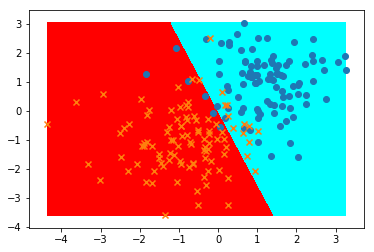

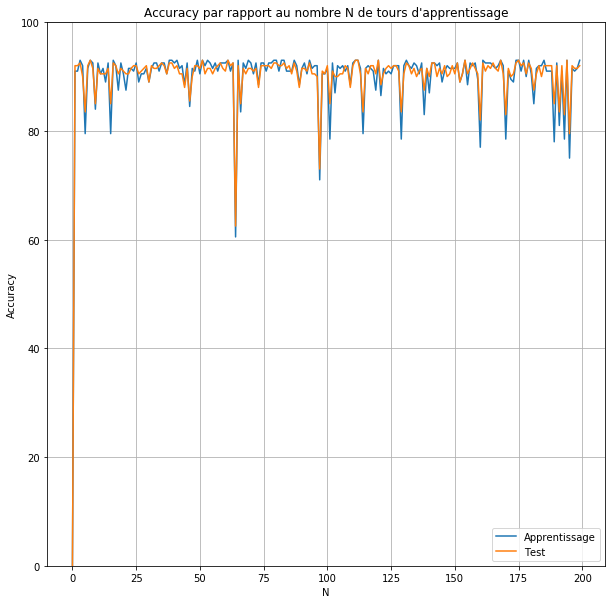

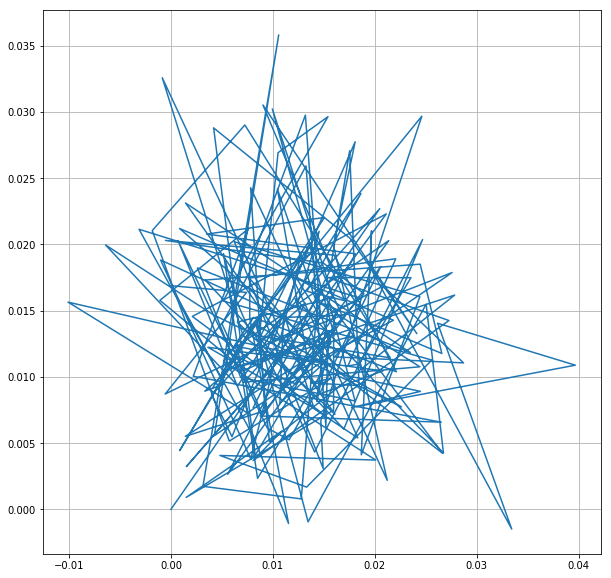

In [14]:
perceptron_bad = ClassifierPerceptron(2, e)

tab_acc_learn = np.zeros(N)
tab_acc_test = np.zeros(N)
tab_w = np.empty((N, 2))

for i in range(N):
    tab_acc_learn[i] += perceptron_bad.accuracy(set_learn)
    tab_acc_test[i] += perceptron_bad.accuracy(set_test)
    tab_w[i, :] = perceptron_bad.w
    perceptron_bad.bad_train(set_learn)

ut.plot_frontiere(set_test,perceptron_bad)
ut.plot2DSet(set_test)
print("Accuracy du perceptron: " + str(perceptron_bad.accuracy(set_test))+ "%")

tab_N = np.arange(N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(True)
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
ax.set_ylim([0, 100])
ax.plot(tab_N, tab_acc_learn, label = 'Apprentissage') 
ax.plot(tab_N, tab_acc_test, label = 'Test')

ax.legend(loc = "lower right")
ax.set_title("Accuracy par rapport au nombre N de tours d'apprentissage")

fig, bx = plt.subplots(figsize=(10, 10))
bx.grid(True)
bx.plot(tab_w[:, 0], tab_w[:, 1], label = 'w');

On observe dans cet exemple que, sans la normalisation, le vecteur `w` oscille beaucoup, ainsi que l'accuracy. En effet, `w` démarre à `0` et ne change qu'en pas de epsilon. De plus, `w` n'est modifié que s'il a mal identifié un point, ce qui veut dire que, tipiquement, la modification dans `w` ira dans une direction contraire à celle de `w`. Cette modification étant toujours de taille epsilon, `w` fait des pas de taille epsilon, chaque pas dans une direction plutôt opposée au précédent, de sorte qu'il oscille beaucoup et reste toujours avec une norme de l'ordre de epsilon. Ainsi, l'effet relatif d'une modification sur `w` est plus important, car la modification a toujours une taille du même ordre que la taille de `w`, tous les deux étant de taille epsilon.

En particulier, si à la fin de l'entrainement on passe par une "mauvaise" donnée, loin de la moyenne des données de même catégorie, cette mauvaise donnée fera une modification importante sur `w`, qui sera donc mauvais pour la plupart des "bonnes" données, faisant diminuer l'accuracy du perceptron.

<font color="RED" size="+1">**[Q]**</font> **Données XOR**

Ecrire la fonction `createXOR` qui, étant donné un nombre de points $n$ et une variance $var$, permet de générer une base de données contenant:
- deux gaussiennes centrées en (0,0) et (1,1) correspondant à $n$ exemples positifs
- deux gaussiennes centrées en (1,0) et (0,1) correspondant à $n$ exemples négatifs

Dans la suite, on appelle XOR une base de données créée par cette fonction.


Que se passe-t-il quand on apprend un perceptron  ? Quel est le problème ? 

In [15]:
def createXOR_bad(nb_points,var):
    set1 = ut.createGaussianDataset(np.array([1,1]),np.array([[var,0],[0,var]]),np.array([1,0]),np.array([[var,0],[0,var]]),nb_points)
    set2 = ut.createGaussianDataset(np.array([0,0]),np.array([[var,0],[0,var]]),np.array([0,1]),np.array([[var,0],[0,var]]),nb_points)
    taille = set2.size()
    for i in range(taille):
        set1.addExample(set2.getX(i), set2.getY(i))
    return set1



def createXOR(nb_points,var):
    set1 = ut.createGaussianDataset(np.array([1,1]),np.array([[var,0],[0,var]]),np.array([1,-1]),np.array([[var,0],[0,var]]),nb_points)
    set2 = ut.createGaussianDataset(np.array([-1,-1]),np.array([[var,0],[0,var]]),np.array([-1,1]),np.array([[var,0],[0,var]]),nb_points)
    taille = set2.size()
    for i in range(taille):
        set1.addExample(set2.getX(i), set2.getY(i))
    return set1


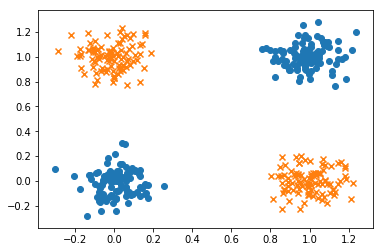

In [16]:
xor_bad=createXOR_bad(100,0.01)
ut.plot2DSet(xor_bad)

Si on avait choisi un XOR avec données centrées comme dans l'énoncé, en (0, 0) et (1, 1) pour +1 et (0, 1) et (1, 0) pour -1, comme le perceptron utilisé représente une droite passant toujours par l'origine, il serait biaisé par rapport au centre (0, 0). Le choix symétrique par rapport à (0, 0) permet d'éviter ce problème.

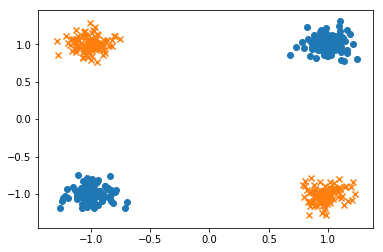

In [17]:
xor=createXOR(100,0.01)
ut.plot2DSet(xor)

On a construit un ensemble XOR symétrique, où les centres des données positives sont en (-1, -1) et (1, 1) et les centres des données négatives en (-1, 1) et (1, -1). L'ensemble XOR n'est pas linéairement séparable par une droite passant par l'origine. Toute droite laissera approximativement 50% des données d'un type d'un côté et 50% de l'autre. Ainsi, l'accuracy d'un perceptron simple est toujours de l'ordre de 50%, et il est impossible d'en faire mieux avec une séparation linéaire passant par l'origine.

Accuracy du perceptron: 46.75%


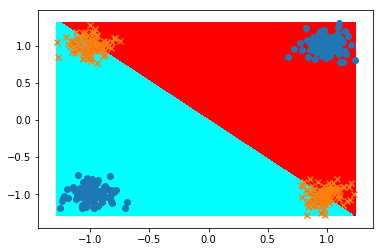

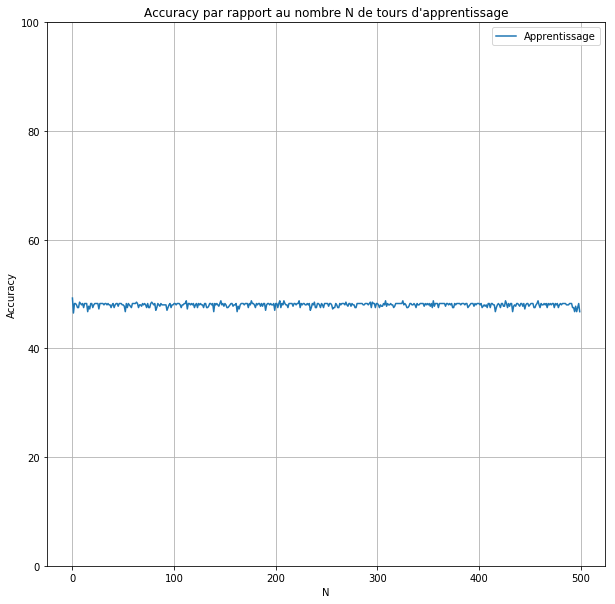

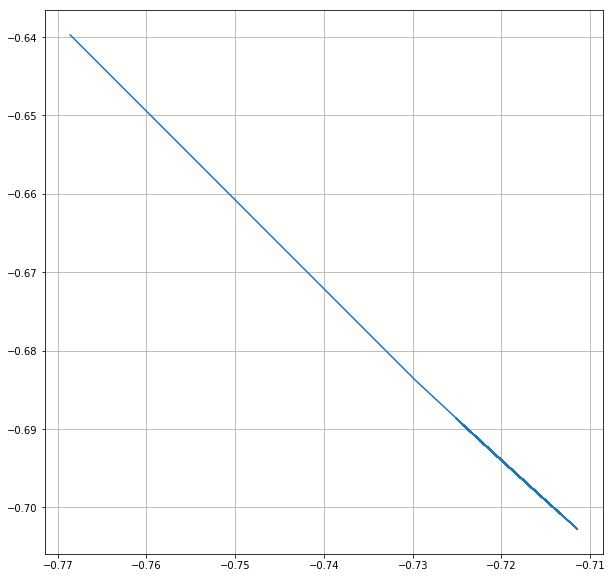

In [18]:
N = 500
e = 0.001

perceptron_xor = ClassifierPerceptron(2, e)

tab_acc_learn = np.zeros(N)
tab_acc_test = np.zeros(N)
tab_w = np.empty((N, 2))

for i in range(N):
    perceptron_xor.train(xor)
    tab_acc_learn[i] += perceptron_xor.accuracy(xor)
    tab_w[i, :] = perceptron_xor.w

ut.plot_frontiere(xor,perceptron_xor)
ut.plot2DSet(xor)
print("Accuracy du perceptron: " + str(perceptron_xor.accuracy(xor))+ "%")

tab_N = np.arange(N)

fig, ax = plt.subplots(figsize=(10, 10))
ax.grid(True)
ax.set_xlabel("N")
ax.set_ylabel("Accuracy")
ax.set_ylim([0, 100])
ax.plot(tab_N, tab_acc_learn, label = 'Apprentissage') 

ax.legend(loc = "upper right")
ax.set_title("Accuracy par rapport au nombre N de tours d'apprentissage")

fig, bx = plt.subplots(figsize=(10, 10))
bx.grid(True)
bx.plot(tab_w[:, 0], tab_w[:, 1], label = 'w');

Kernel Trick
--------------

Nous allons projeter (manuellement) les données 2D dans un espace de plus grande dimension. Voici un exemple de projection qui transforme un vecteur $(x_1,x_2)$ en un vecteur $(x_1,x_2,1)$

In [19]:
class KernelBias:
    def transform(self,x):
        y=np.asarray([x[0],x[1],1])
        return y

k=KernelBias()
print(the_set.getX(1))
k.transform(the_set.getX(1))


[-2.84431885  0.13410525]


array([-2.84431885,  0.13410525,  1.        ])

<font color="RED" size="+1">**[Q]**</font> Implémenter la classe ClassifierPerceptronKernel qui prend un Kernel en paramètre, et calcule le perceptron sur la version "kernélisée" des données. Tester ce perceptron sur le dataset 1 (2 gaussiennes) et le dataset XOR.

In [20]:
class ClassifierPerceptronKernel(cl.Classifier):
    def __init__(self,dimension_kernel,learning_rate,kernel):
        """ Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - learning_rate :
            Hypothèse : input_dimension > 0
        """
        self.w = np.zeros(dimension_kernel)
        self.e = learning_rate
        self.k = kernel

        
    def predict(self,x):
        """ rend la prediction sur x (-1 ou +1)
        """
        z = self.k.transform(x)
        res = np.dot(z, self.w)
        return res

    
    def train(self,labeledSet):
        """ Permet d'entrainer le modele sur l'ensemble donné
        """
        ordre = np.arange(labeledSet.size())
        np.random.shuffle(ordre)
        for i in ordre:
            elem = labeledSet.getX(i)
            elem = self.k.transform(elem)
            z = np.dot(elem, self.w)
            if z * labeledSet.getY(i) <= 0:
                self.w += self.e * elem * labeledSet.getY(i)
                # La normalisation de w a été choisie pour garantir
                #que chaque modification de w est petite (de l'ordre de self.e) 
                #par rapport à la valeur précédente de w.
                self.w /= np.linalg.norm(self.w)
        
        
        
    def train_bad(self,labeledSet):
        """ Version sans normalisation de w 
        """  
        i = np.random.randint(labeledSet.size())
        elem = labeledSet.getX(i)
        elem = self.k.transform(elem)
        z = np.dot(elem, self.w)
        if z * labeledSet.getY(i) <= 0:
            self.w = self.w + self.e *(elem * labeledSet.getY(i))

        

Accuracy du perceptronKernel sur 2 gaussiennes: 90.0%


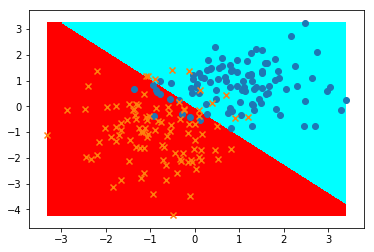

In [25]:
N = 200
e = 0.01
k=KernelBias()

set_learn = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)
set_test = ut.createGaussianDataset(np.array([1,1]),np.array([[1,0],[0,1]]),np.array([-1,-1]),np.array([[1,0],[0,1]]),100)

perceptron_k1 = ClassifierPerceptronKernel(3, e, k)

for i in range(N):
    perceptron_k1.train(set_learn)
    
ut.plot_frontiere(set_test,perceptron_k1)
ut.plot2DSet(set_test)
print("Accuracy du perceptronKernel sur 2 gaussiennes: " + str(perceptron_k1.accuracy(set_test))+ "%")


Accuracy du perceptronKernel sur XOR: 54.25%


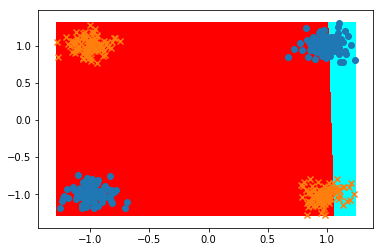

In [27]:
k=KernelBias()
perceptron_k2 = ClassifierPerceptronKernel(3, e, k)

for i in range(N):
    perceptron_k2.train(xor)

ut.plot_frontiere(xor,perceptron_k2)
ut.plot2DSet(xor)
print("Accuracy du perceptronKernel sur XOR: " + str(perceptron_k2.accuracy(xor))+ "%")

Avec le KernelBias, le perceptron continue à implémenter une droite, mais celle-ci ne passe plus forcément par l'origine. Pour les données gaussiennes, cela reste tout aussi bon, car les gaussiennes choisies peuvent être séparées par une droite passant par l'origine. Pour le XOR, il ne peut pas être séparé à mieux que 50% même si la droite ne passe pas par l'origine, et donc l'accuracy ne s'améliore pas.

<font color="RED" size="+1">**[Q]**</font> Implémenter le kernel : $(x_1,x_2) \rightarrow (1,x_1,x_2,x_1*x_1,x_2*x_2,x_1*x_2)$. Entrainer le perceptron correspondant sur le XOR. Que constatez-vous ? Donnez une explication (explication donnée en cours lors de la prochaine séance)

Accuracy du perceptronKernel sur XOR: 100.0%


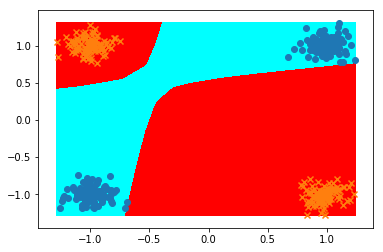

In [28]:
class KernelPoly:
    def transform(self,x):
        y = np.asarray([1, x[0], x[1], x[0]*x[0], x[1]*x[1], x[0]*x[1]])
        return y

N=1000
k=KernelPoly()
perceptron_k=ClassifierPerceptronKernel(6,0.001,k)

for i in range(N):
    perceptron_k.train(xor)

ut.plot_frontiere(xor,perceptron_k)
ut.plot2DSet(xor)
print("Accuracy du perceptronKernel sur XOR: " + str(perceptron_k.accuracy(xor))+ "%")




Avec le KernelPoly, on rajoute des termes non-linéaires, le perceptron implémente une classification par une courbe non-droite (avec les termes ajoutées, cette courbe correspond à un polynôme de degré 2). Cela permet alors de mieux séparer les données du XOR et avoir une accuracy bien supérieure à 50%.

Expérimentations sur des datasets réels
-------



A partir de datasets trouvés sur le web, réaliser un ensemble d'expérimentations permettant de comparer les 3 classifiers (knn, perceptron de Rosenblatt et version kernélisée) que vous avez implémentés.

Par exemple, vous pouvez utiliser les datasets suivants:
- https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra
- https://www.kaggle.com/uciml/indian-liver-patient-records
- voir sur les données ouvertes de Paris : https://opendata.paris.fr/explore/?sort=modified

Afin d'utiliser de tels jeux de données, il sera certainement nécessaire que vous réalisiez un prétraitement afin de pouvoir utiliser vos implémentations.